### State Space Discretization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tempfile
import base64
import pprint
import json
import sys
import gym
import io

from gym import wrappers
from subprocess import check_output
from IPython.display import HTML

#### Q-Learning

In [2]:
def action_selection(state, Q, episode, n_episodes):
    epsilon = max(0, episode/n_episodes*2)
    if np.random.random() < epsilon:
        action = np.random.randint(len(Q[0]))
    else:
        action = np.argmax(Q[state])
    return action

In [3]:
def q_learning(env, alpha = 0.9, gamma = 0.9):
    nS = env.env.observation_space.n
    nA = env.env.action_space.n
    
    Q = np.random.random((nS, nA)) * 2.0
    n_episodes = 10000
    
    for episode in range(n_episodes//2, -n_episodes//2, -1):
        state = env.reset()
        done = False
        while not done:
            action = action_selection(state, Q, episode, n_episodes)
            nstate, reward, done, info = env.step(action)
            Q[state][action] += alpha * (reward + gamma * Q[nstate].max() * (not done) - Q[state][action])
            state = nstate
    return Q

In [4]:
mdir = tempfile.mkdtemp()
env = gym.make('CartPole-v0')
Q = q_learning(env)

[2017-04-02 07:05:07,317] Making new env: CartPole-v0


AttributeError: 'Box' object has no attribute 'n'

In [5]:
env = gym.make('CartPole-v0')
observations = []
for i_episode in range(20):
    observation = env.reset()
    for t in range(1000):
        env.render()
        observations.append(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()
x_vals = np.array(observations)[:,0]
xd_vals = np.array(observations)[:,1]
a_vals = np.array(observations)[:,2]
ad_vals = np.array(observations)[:,3]
y = np.zeros_like(x_vals)

[2017-04-02 07:05:07,950] Making new env: CartPole-v0


Episode finished after 15 timesteps
Episode finished after 13 timesteps
Episode finished after 19 timesteps
Episode finished after 15 timesteps
Episode finished after 18 timesteps
Episode finished after 14 timesteps
Episode finished after 25 timesteps
Episode finished after 14 timesteps
Episode finished after 11 timesteps
Episode finished after 17 timesteps
Episode finished after 22 timesteps
Episode finished after 13 timesteps
Episode finished after 18 timesteps
Episode finished after 14 timesteps
Episode finished after 13 timesteps
Episode finished after 17 timesteps
Episode finished after 29 timesteps
Episode finished after 16 timesteps
Episode finished after 16 timesteps
Episode finished after 16 timesteps


In [6]:
env.env.observation_space.high/2

array([  2.40000000e+00,   1.70141173e+38,   2.09439510e-01,
         1.70141173e+38])

In [7]:
env.env.observation_space.low/2

array([ -2.40000000e+00,  -1.70141173e+38,  -2.09439510e-01,
        -1.70141173e+38])

In [8]:
x_thres_high = (env.env.observation_space.high/2)[0]
x_thres_low = (env.env.observation_space.low/2)[0]
angle_thres_high = (env.env.observation_space.high/2)[2]
angle_thres_low = (env.env.observation_space.low/2)[2]

(-0.2, 0.2)

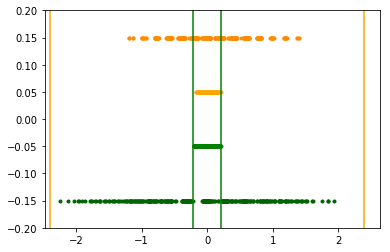

In [9]:
plt.plot(xd_vals, y + 0.15, '.', color='darkorange')
plt.plot(x_vals, y + 0.05, '.', color='orange')
plt.plot(a_vals, y - 0.05, '.', color='green')
plt.plot(ad_vals, y - 0.15, '.', color='darkgreen')


plt.axvline(x=x_thres_high, color='orange')
plt.axvline(x=x_thres_low, color='orange')
plt.axvline(x=angle_thres_high, color='green')
plt.axvline(x=angle_thres_low, color='green')

plt.ylim([-0.2, 0.2])

(-0.1, 0.1)

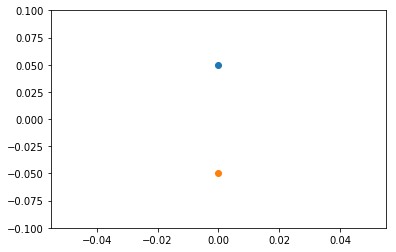

In [10]:
x1 = np.linspace(x_thres_low, x_thres_high, 
                 2, endpoint=False)[1:]
x2 = np.linspace(x_thres_low + .5, x_thres_high - .5, 
                 2, endpoint=False)[1:]
y1 = np.zeros(len(x1)) + 0.05
y2 = np.zeros(len(x2)) - 0.05
plt.plot(x1, y1, 'o')
plt.plot(x2, y2, 'o')

plt.ylim([-0.1, 0.1])

In [11]:
x2

array([ 0.])

In [12]:
len(x2)

1

(-0.1, 0.1)

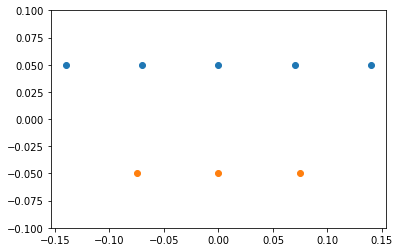

In [321]:
a1 = np.linspace(angle_thres_low, angle_thres_high, 
                 6, endpoint=False)[1:]
all_vals = np.sort(np.append(
    (np.logspace(-5, 0.01, 4, endpoint=False, base=2)[1:],
    -np.logspace(-5, 0.01, 4, endpoint=False, base=2)[1:]), 0))
idxs = np.where(np.abs(all_vals) < angle_thres_high - 0.05)
a2 = all_vals[idxs]
y1 = np.zeros(len(a1)) + 0.05
y2 = np.zeros(len(a2)) - 0.05
plt.plot(a1, y1, 'o')
plt.plot(a2, y2, 'o')

plt.ylim([-0.1, 0.1])

In [322]:
a2

array([-0.07445435,  0.        ,  0.07445435])

In [156]:
len(a2)

7

In [157]:
np.digitize(-0.99, a2)

array(0)

In [158]:
np.digitize(0.99, a2)

array(7)

In [159]:
np.digitize(0, a2)

array(4)

In [93]:
np.digitize(-0.0001, a2)

array(3)

In [94]:
np.digitize(0.0001, a2)

array(4)

In [95]:
env = gym.make('CartPole-v0')
observations = []
for i_episode in range(20):
    observation = env.reset()
    for t in range(100):
        env.render()
        observations.append(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()
x_vals = np.array(observations)[:,0]
xd_vals = np.array(observations)[:,1]
a_vals = np.array(observations)[:,2]
ad_vals = np.array(observations)[:,3]
y = np.zeros_like(x_vals)

[2017-04-02 07:11:47,597] Making new env: CartPole-v0


Episode finished after 13 timesteps
Episode finished after 17 timesteps
Episode finished after 22 timesteps
Episode finished after 19 timesteps
Episode finished after 30 timesteps
Episode finished after 11 timesteps
Episode finished after 29 timesteps
Episode finished after 25 timesteps
Episode finished after 15 timesteps
Episode finished after 12 timesteps
Episode finished after 15 timesteps
Episode finished after 22 timesteps
Episode finished after 10 timesteps
Episode finished after 11 timesteps
Episode finished after 20 timesteps
Episode finished after 10 timesteps
Episode finished after 17 timesteps
Episode finished after 12 timesteps
Episode finished after 28 timesteps
Episode finished after 50 timesteps


(-0.2, 0.2)

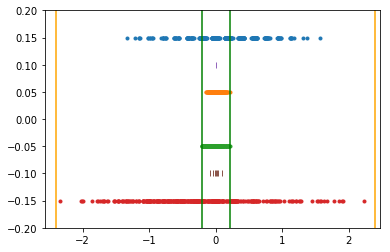

In [96]:
plt.plot(xd_vals, y + 0.15, '.')
plt.plot(x_vals, y + 0.05, '.')
plt.plot(a_vals, y - 0.05, '.')
plt.plot(ad_vals, y - 0.15, '.')

yx2 = np.zeros_like(x2) + 0.1
ya2 = np.zeros_like(a2) - 0.1
plt.plot(x2, yx2, '|')
plt.plot(a2, ya2, '|')

plt.axvline(x=x_thres_high, color='orange')
plt.axvline(x=x_thres_low, color='orange')
plt.axvline(x=angle_thres_high, color='green')
plt.axvline(x=angle_thres_low, color='green')

plt.ylim([-0.2, 0.2])

In [311]:
d1 = np.sort(np.append(np.linspace(-2, 2, 8, endpoint=True), 0))
d1

array([-2.        , -1.42857143, -0.85714286, -0.28571429,  0.        ,
        0.28571429,  0.85714286,  1.42857143,  2.        ])

In [312]:
len(d1)

9

In [313]:
all_vals = np.sort(np.append(
    (np.logspace(-7, 4, 6, endpoint=False, base=2)[1:],
    -np.logspace(-7, 4, 6, endpoint=False, base=2)[1:]), 0))
idxs = np.where(np.abs(all_vals) < 2)
d2 = all_vals[idxs]
d2

array([-1.25992105, -0.35355339, -0.09921257, -0.02784058,  0.        ,
        0.02784058,  0.09921257,  0.35355339,  1.25992105])

In [314]:
len(d2)

9

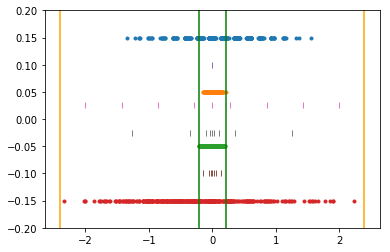

In [315]:
plt.plot(xd_vals, y + 0.15, '.')
plt.plot(x_vals, y + 0.05, '.')
plt.plot(a_vals, y - 0.05, '.')
plt.plot(ad_vals, y - 0.15, '.')

yx2 = np.zeros_like(x2) + 0.1
ya2 = np.zeros_like(a2) - 0.1
plt.plot(x2, yx2, '|')
plt.plot(a2, ya2, '|')

plt.axvline(x=x_thres_high, color='orange')
plt.axvline(x=x_thres_low, color='orange')
plt.axvline(x=angle_thres_high, color='green')
plt.axvline(x=angle_thres_low, color='green')

plt.ylim([-0.2, 0.2])

yd1 = np.zeros(len(d1)) + 0.025
yd2 = np.zeros(len(d2)) - 0.025
plt.plot(d1, yd1, '|')
plt.plot(d2, yd2, '|')

In [316]:
len(x2)

1

In [103]:
len(a2)

7

In [104]:
len(d1)

9

In [364]:
len(d2)

9

In [418]:
epsilons = []
alphas = []

In [419]:
def learning_schedule(episode, n_episodes):
    return max(0., min(0.8, 1 - episode/n_episodes))

In [420]:
def action_selection(state, Q, episode, n_episodes):
    epsilon = 0.99 if episode < n_episodes//4 else 0.33 if episode < n_episodes//2 else 0.
    epsilons.append(epsilon)
    if np.random.random() < epsilon:
        action = np.random.randint(Q.shape[1])
    else:
        action = np.argmax(Q[state])
    return action

In [421]:
def observation_to_state(observation, bins):
    ss = []
    for i in range(len(observation)):
        ss.append(int(np.digitize(observation[i], bins=bins[i])))
    state = int("".join(map(lambda feature: str(int(feature)), ss)))
    return state

In [422]:
def q_learning(env, bins, gamma = 0.99):
    nS = 10 * 10 * 10 * 10
    nA = env.env.action_space.n
    
    Q = np.random.random((nS, nA)) - 0.5
    n_episodes = 5000
    
    for episode in range(n_episodes):
        observation = env.reset()
        state = observation_to_state(observation, bins)
    
        done = False
        while not done:
            action = action_selection(state, Q, episode, n_episodes)
            observation, reward, done, info = env.step(action)
            nstate = observation_to_state(observation, bins)
            alpha = learning_schedule(episode, n_episodes)
            alphas.append(alpha)
            Q[state][action] += alpha * (reward + gamma * Q[nstate].max() * (not done) - Q[state][action])
            state = nstate
    return Q

In [423]:
mdir = tempfile.mkdtemp()
env = gym.make('CartPole-v0')
env = wrappers.Monitor(env, mdir, force=True)

Q = q_learning(env, (x1, d1, a2, d1))

[2017-04-02 08:06:43,887] Making new env: CartPole-v0
[2017-04-02 08:06:43,899] Starting new video recorder writing to /tmp/tmpugzt2mpm/openaigym.video.32.43.video000000.mp4
[2017-04-02 08:06:44,218] Starting new video recorder writing to /tmp/tmpugzt2mpm/openaigym.video.32.43.video000001.mp4
[2017-04-02 08:06:44,554] Starting new video recorder writing to /tmp/tmpugzt2mpm/openaigym.video.32.43.video000008.mp4
[2017-04-02 08:06:44,792] Starting new video recorder writing to /tmp/tmpugzt2mpm/openaigym.video.32.43.video000027.mp4
[2017-04-02 08:06:45,129] Starting new video recorder writing to /tmp/tmpugzt2mpm/openaigym.video.32.43.video000064.mp4
[2017-04-02 08:06:45,431] Starting new video recorder writing to /tmp/tmpugzt2mpm/openaigym.video.32.43.video000125.mp4
[2017-04-02 08:06:45,778] Starting new video recorder writing to /tmp/tmpugzt2mpm/openaigym.video.32.43.video000216.mp4
[2017-04-02 08:06:46,161] Starting new video recorder writing to /tmp/tmpugzt2mpm/openaigym.video.32.43.vi

In [424]:
videos = np.array(env.videos)
n_videos = 3

idxs = np.linspace(0, len(videos) - 1, n_videos).astype(int)
videos = videos[idxs,:]

strm = ''
for video_path, meta_path in videos:
    video = io.open(video_path, 'r+b').read()
    encoded = base64.b64encode(video)
    
    with open(meta_path) as data_file:    
        meta = json.load(data_file)

    html_tag = """
    <h2>{0}<h2/>
    <video width="960" height="540" controls>
        <source src="data:video/mp4;base64,{1}" type="video/mp4" />
    </video>"""
    strm += html_tag.format('Episode ' + str(meta['episode_id']), encoded.decode('ascii'))
HTML(data=strm)

In [425]:
V = np.max(Q, axis=1)
V

array([ 0.11483848,  0.33900246,  0.21024581, ..., -0.25981988,
        0.34267011, -0.10423421])

In [426]:
V.max()

88.597216527950323

In [427]:
pi = np.argmax(Q, axis=1)
pi

array([1, 1, 0, ..., 0, 0, 0])

In [428]:
env.close()

[2017-04-02 08:07:17,855] Finished writing results. You can upload them to the scoreboard via gym.upload('/tmp/tmpugzt2mpm')


In [429]:
gym.upload(mdir, api_key='sk_2Z7ZMK8RRaiIU5WVirHYGg')

[2017-04-02 08:07:17,876] [CartPole-v0] Uploading 5000 episodes of training data
[2017-04-02 08:07:18,880] [CartPole-v0] Uploading videos of 14 training episodes (67686 bytes)
[2017-04-02 08:07:19,227] [CartPole-v0] Creating evaluation object from /tmp/tmpugzt2mpm with learning curve and training video
[2017-04-02 08:07:19,593] 
****************************************************
You successfully uploaded your evaluation on CartPole-v0 to
OpenAI Gym! You can find it at:

    https://gym.openai.com/evaluations/eval_N2ilF5VpSZikmGxJ5XC6qg

****************************************************


In [430]:
np.mean(epsilons)

0.1074521257682735

In [431]:
np.mean(alphas)

0.33270651462047729

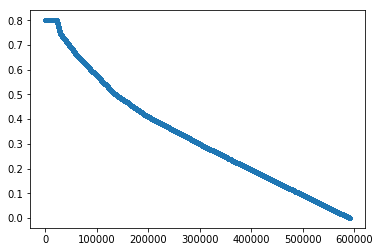

In [432]:
plt.plot(np.arange(len(alphas)), alphas, '.')

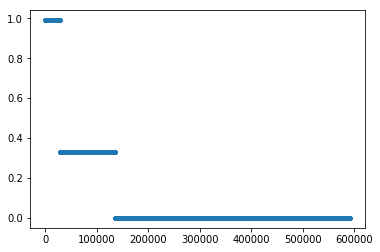

In [433]:
plt.plot(np.arange(len(epsilons)), epsilons, '.')

In [331]:
x1

array([ 0.])

In [332]:
x2

array([ 0.])

In [333]:
mdir = tempfile.mkdtemp()
env = gym.make('CartPole-v0')
env = wrappers.Monitor(env, mdir, force=True)

Q2 = q_learning(env, (x2, d2, a2, d2))

[2017-04-02 07:49:53,984] Making new env: CartPole-v0
[2017-04-02 07:49:53,994] Starting new video recorder writing to /tmp/tmp_a0_fh5d/openaigym.video.26.43.video000000.mp4
[2017-04-02 07:49:54,347] Starting new video recorder writing to /tmp/tmp_a0_fh5d/openaigym.video.26.43.video000001.mp4
[2017-04-02 07:49:54,821] Starting new video recorder writing to /tmp/tmp_a0_fh5d/openaigym.video.26.43.video000008.mp4
[2017-04-02 07:49:55,135] Starting new video recorder writing to /tmp/tmp_a0_fh5d/openaigym.video.26.43.video000027.mp4
[2017-04-02 07:49:55,531] Starting new video recorder writing to /tmp/tmp_a0_fh5d/openaigym.video.26.43.video000064.mp4
[2017-04-02 07:49:55,780] Starting new video recorder writing to /tmp/tmp_a0_fh5d/openaigym.video.26.43.video000125.mp4
[2017-04-02 07:49:56,176] Starting new video recorder writing to /tmp/tmp_a0_fh5d/openaigym.video.26.43.video000216.mp4
[2017-04-02 07:49:56,490] Starting new video recorder writing to /tmp/tmp_a0_fh5d/openaigym.video.26.43.vi

In [150]:
videos = np.array(env.videos)
n_videos = 3

idxs = np.linspace(0, len(videos) - 1, n_videos).astype(int)
videos = videos[idxs,:]

strm = ''
for video_path, meta_path in videos:
    video = io.open(video_path, 'r+b').read()
    encoded = base64.b64encode(video)
    
    with open(meta_path) as data_file:    
        meta = json.load(data_file)

    html_tag = """
    <h2>{0}<h2/>
    <video width="960" height="540" controls>
        <source src="data:video/mp4;base64,{1}" type="video/mp4" />
    </video>"""
    strm += html_tag.format('Episode ' + str(meta['episode_id']), encoded.decode('ascii'))
HTML(data=strm)

In [303]:
V = np.max(Q2, axis=1)
V

array([ 0.43423644,  0.34219853, -0.14983771, ...,  0.49456146,
       -0.21242407,  0.34735347])

In [304]:
V.max()

66.915372279420055

In [305]:
pi = np.argmax(Q2, axis=1)
pi

array([1, 0, 0, ..., 0, 0, 1])

In [334]:
env.close()

[2017-04-02 07:50:29,282] Finished writing results. You can upload them to the scoreboard via gym.upload('/tmp/tmp_a0_fh5d')


In [335]:
gym.upload(mdir, api_key='sk_2Z7ZMK8RRaiIU5WVirHYGg')

[2017-04-02 07:50:30,436] [CartPole-v0] Uploading 5000 episodes of training data
[2017-04-02 07:50:31,497] [CartPole-v0] Uploading videos of 14 training episodes (59615 bytes)
[2017-04-02 07:50:31,820] [CartPole-v0] Creating evaluation object from /tmp/tmp_a0_fh5d with learning curve and training video
[2017-04-02 07:50:32,176] 
****************************************************
You successfully uploaded your evaluation on CartPole-v0 to
OpenAI Gym! You can find it at:

    https://gym.openai.com/evaluations/eval_sbm30gRemnJmnoyVLQ

****************************************************
